# Sample Correlation Coefficient (r)

The **Pearson correlation coefficient (r)** quantifies the strength of a **linear relationship** between two variables **X** and **Y**.

---

## Formula 1: Covariance-based definition

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
         {\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{x})^2\right)\left(\sum_{i=1}^{n} (y_i - \bar{y})^2\right)}}
$$

---

## Formula 2: Alternative computational form

$$
r = \frac{n\sum_{i=1}^{n} x_i y_i - \left(\sum_{i=1}^{n} x_i\right)\left(\sum_{i=1}^{n} y_i\right)}
         {\sqrt{\left[n\sum_{i=1}^{n} x_i^2 - \left(\sum_{i=1}^{n} x_i\right)^2\right]
                 \left[n\sum_{i=1}^{n} y_i^2 - \left(\sum_{i=1}^{n} y_i\right)^2\right]}}
$$


## Interpretation

- \(r \in [-1,1]\)  
- \(r > 0\) → positive correlation  
- \(r < 0\) → negative correlation  
- \(r = 0\) → no linear correlation


## Example

Suppose we have paired data for **Study Hours (X)** and **Test Scores (Y)**:

| Student | Hours Studied (X) | Test Score (Y) |
|---------|-------------------|----------------|
| A       | 2                 | 50             |
| B       | 4                 | 65             |
| C       | 5                 | 80             |
| D       | 7                 | 85             |
| E       | 8                 | 90             |

Using either formula, we compute:

\[
r \approx 0.97
\]

✅ This indicates a **strong positive correlation** between study hours and test scores.

---


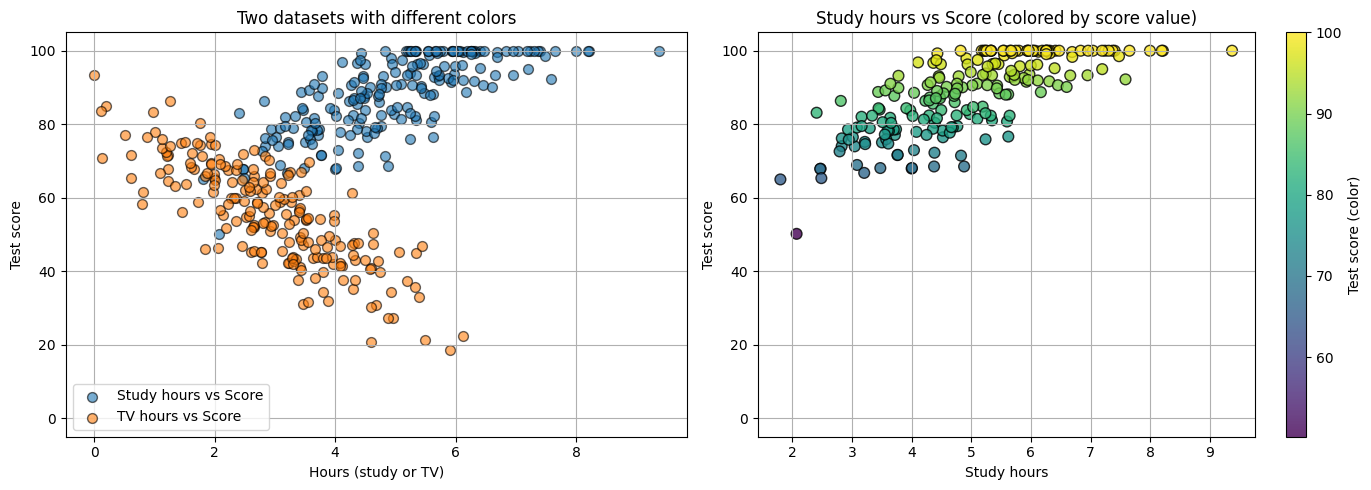

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# RNG
rng = np.random.default_rng(42)
n = 200

# Positive correlation example: Study hours vs Test scores
study_hours = rng.normal(loc=5, scale=1.5, size=n)
study_hours = np.clip(study_hours, 0, None)
scores_pos = 50 + study_hours * 8 + rng.normal(0, 8, size=n)
scores_pos = np.clip(scores_pos, 0, 100)

# Negative correlation example: TV hours vs Test scores
tv_hours = rng.normal(loc=3, scale=1.2, size=n)
tv_hours = np.clip(tv_hours, 0, None)
scores_neg = 85 - tv_hours * 10 + rng.normal(0, 8, size=n)
scores_neg = np.clip(scores_neg, 0, 100)

# Create figure with two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1) Different colors for two datasets on the same axes
ax = axes[0]
ax.scatter(study_hours, scores_pos, c='tab:blue', alpha=0.6, label='Study hours vs Score', edgecolor='k', s=50)
ax.scatter(tv_hours, scores_neg, c='tab:orange', alpha=0.6, label='TV hours vs Score', edgecolor='k', s=50)
ax.set_xlabel('Hours (study or TV)')
ax.set_ylabel('Test score')
ax.set_ylim(-5, 105)
ax.set_title('Two datasets with different colors')
ax.legend()
ax.grid(True)

# 2) Color points by their score value (continuous colormap)
ax2 = axes[1]
sc = ax2.scatter(study_hours, scores_pos, c=scores_pos, cmap='viridis', alpha=0.8, s=60, edgecolor='k')
ax2.set_xlabel('Study hours')
ax2.set_ylabel('Test score')
ax2.set_ylim(-5, 105)
ax2.set_title('Study hours vs Score (colored by score value)')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Test score (color)')
ax2.grid(True)

plt.tight_layout()
plt.show()



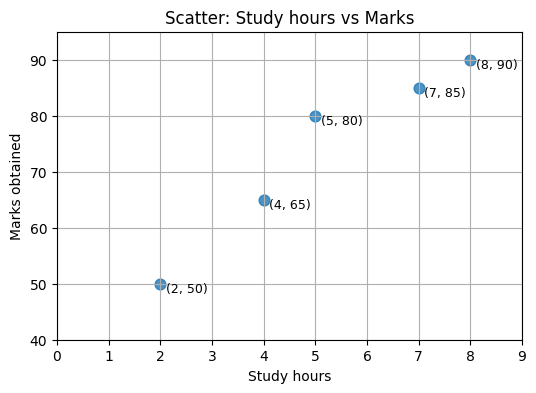

In [9]:
study_hours = [2, 4, 5, 7, 8]
marks = [50, 65, 80, 85, 90]

# Plot
plt.figure(figsize=(6,4))
plt.scatter(study_hours, marks, s=60, alpha=0.8)  # simple scatter
plt.xlabel('Study hours')
plt.ylabel('Marks obtained')
plt.title('Scatter: Study hours vs Marks')
plt.grid(True)
plt.xlim(0, 9)
plt.ylim(40, 95)

# Annotate points with their values (optional)
for x, y in zip(study_hours, marks):
    plt.text(x + 0.1, y - 1.5, f'({x}, {y})', fontsize=9)

plt.show()



Pearson r = 0.966758
Regression line: y = 6.622807 * x + 39.561404
R-squared = 0.934620


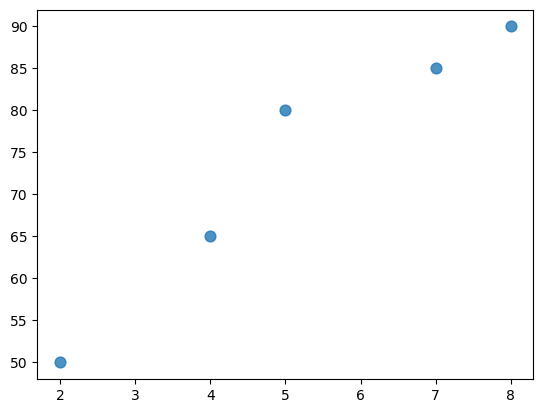

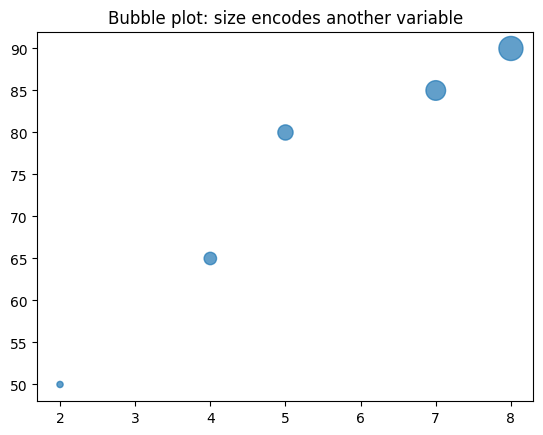

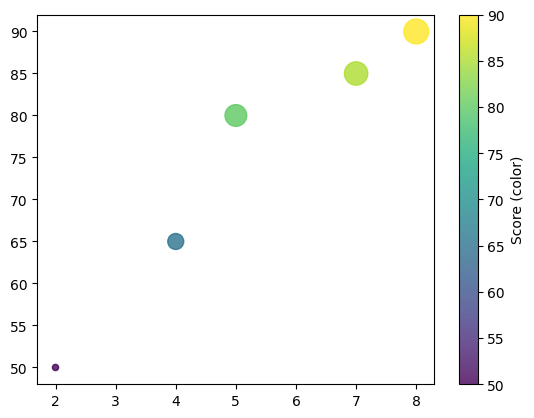

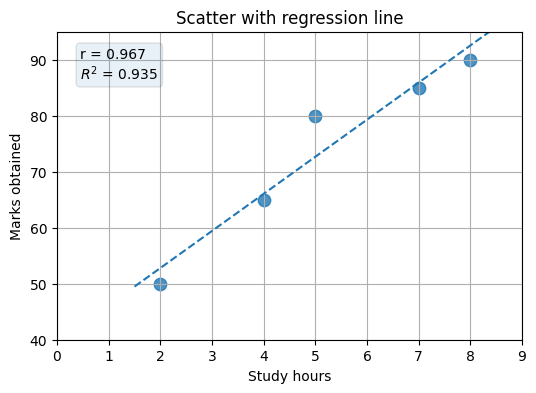

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
study_hours = np.array([2, 4, 5, 7, 8], dtype=float)
marks = np.array([50, 65, 80, 85, 90], dtype=float)

# 1) Pearson correlation coefficient
r = np.corrcoef(study_hours, marks)[0,1]

# 2) Linear regression (least squares) using polyfit (degree=1)
slope, intercept = np.polyfit(study_hours, marks, 1)
y_pred = slope * study_hours + intercept

# 3) R-squared
ss_res = np.sum((marks - y_pred)**2)
ss_tot = np.sum((marks - np.mean(marks))**2)
r_squared = 1 - ss_res / ss_tot

# Print numeric results
print(f"Pearson r = {r:.6f}")
print(f"Regression line: y = {slope:.6f} * x + {intercept:.6f}")
print(f"R-squared = {r_squared:.6f}")

plt.scatter(x, y, s=60, alpha=0.8)   # medium size, slightly transparent
plt.show()


sizes = np.array([20, 80, 120, 200, 300])   # per-point areas in points^2
plt.scatter(x, y, s=sizes, alpha=0.7)
plt.title('Bubble plot: size encodes another variable')
plt.show()


scores = y
sizes = (scores - scores.min())/(scores.max()-scores.min()) * 300 + 20
sc = plt.scatter(x, y, s=sizes, c=scores, cmap='viridis', alpha=0.8)
plt.colorbar(sc, label='Score (color)')
plt.show()


# 4) Scatter plot with regression line (single figure)
plt.figure(figsize=(6,4))
plt.scatter(study_hours, marks, s=80, alpha=0.8)
x_line = np.linspace(min(study_hours)-0.5, max(study_hours)+0.5, 100)
plt.plot(x_line, slope * x_line + intercept, linestyle='--', linewidth=1.5)
plt.xlabel('Study hours')
plt.ylabel('Marks obtained')
plt.title('Scatter with regression line')
# annotate r and R^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.3f}\n$R^2$ = {r_squared:.3f}", transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
plt.ylim(40, 95)
plt.xlim(0, 9)
plt.grid(True)
plt.show()
